# 2025 CITS4012 Project
*Make sure you change the file name with your group id.*

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pprint

# For data processing
import re
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize

# For implementing the word2vec family of algorithms
from gensim.models import FastText, KeyedVectors
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/joshtroy/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# Readme
*If there is something to be noted for the marker, please mention here.*

*If you are planning to implement a program with Object Oriented Programming style, please put those the bottom of this ipynb file*

# 1.Dataset Processing
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

## 1.1. Basic preparation: create desired format of words

In [4]:
# Load datasets
train_raw = json.load(open('train.json'))
val_raw = json.load(open('validation.json'))
test_raw = json.load(open('test.json'))

In [133]:
# Common English contractions.
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have",
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not",
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did",
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have",
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have",
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us",
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have",
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not",
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have",
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not",
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have",
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have",
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will",
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have",
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

# Preprocess a list of sentences
def pre_process(sent_list):
    output = []
    for sent in sent_list:
        sent = sent.lower() #case-folding
        for word, new_word in contraction_dict.items():
            sent = sent.replace(word, new_word) #dealing with contractions
        sent = re.sub(r'[^\w\s]','',sent) #removing punctuation
        output.append(word_tokenize(sent)) #tokenization
    return output

def pre_process_datasets(dataset):
    raw_premises = []
    raw_hypotheses = []
    labels = []
    label_keys = []
    keys_as_integers = []
    for key, value in dataset['label'].items():
        labels.append(value)
        label_keys.append(key)
        keys_as_integers.append(int(key))
    raw_premises = [dataset['premise'][key] for key in label_keys]
    raw_hypotheses = [dataset['hypothesis'][key] for key in label_keys]
    processed_premises = pre_process(raw_premises)
    processed_hypotheses = pre_process(raw_hypotheses)
    return processed_premises, processed_hypotheses, labels, keys_as_integers
        
        
# Preprocessing the data using the functions defined above
all_train_premises, all_train_hypotheses, all_train_labels, all_train_keyints = pre_process_datasets(train_raw)
all_val_premises, all_val_hypotheses, all_val_labels, all_val_keyints = pre_process_datasets(val_raw)
all_test_premises, all_test_hypotheses, all_test_labels, all_test_keyints = pre_process_datasets(test_raw)

In [134]:
# Example processing
i = '100'
print("\n ***Before Processing***")
print(train_raw['premise'][i])
print(train_raw['hypothesis'][i])
print(train_raw['label'][i])
print("\n ***After Processing***")
print(all_train_premises[int(i)])
print(all_train_hypotheses[int(i)])
print(all_train_labels[int(i)])


 ***Before Processing***
By combining an up-to-date child I.D. card and the DNA I.D. Kit, parents can have a valuable child identification system.
Children resemble their parents because they have similar dna.
neutral

 ***After Processing***
['by', 'combining', 'an', 'uptodate', 'child', 'id', 'card', 'and', 'the', 'dna', 'id', 'kit', 'parents', 'can', 'have', 'a', 'valuable', 'child', 'identification', 'system']
['children', 'resemble', 'their', 'parents', 'because', 'they', 'have', 'similar', 'dna']
neutral


## 1.2. Clean dataset: remove pathalogical instances

Maximum sentence length: 10563
Minimum sentence length: 0


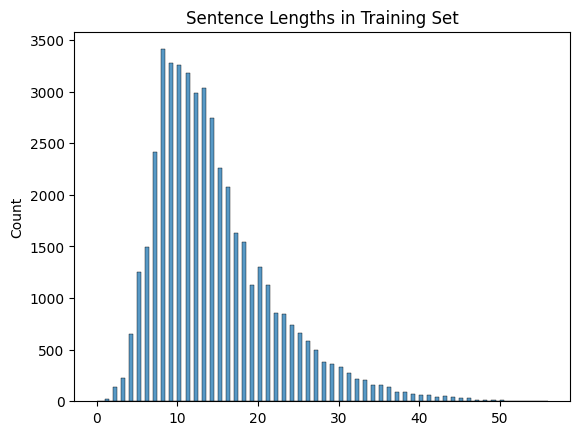

In [138]:
# create combined premise/hypothesis list from the training set to examine
all_train_sentences = all_train_premises + all_train_hypotheses

lengths = np.array([len(sent) for sent in all_train_sentences])
print(f'Maximum sentence length: {lengths.max()}')
print(f'Minimum sentence length: {lengths.min()}')

sns.histplot(lengths[lengths < 60])
plt.title('Sentence Lengths in Training Set')
plt.show()

In [139]:
# Only allow sentences between 3 and MAXLENGTH (=60) words
maxlength = 60

def clean_dataset(premises, hypotheses, labels, keys):
    cleaned_premises = []
    cleaned_hypotheses = []
    cleaned_labels = []
    cleaned_keys = []
    for i in keys:
        if len(premises[i]) >= 3 and len(premises[i]) <= maxlength and len(hypotheses[i]) >= 3 and len(hypotheses[i]) <= maxlength:
            cleaned_premises.append(premises[i])
            cleaned_hypotheses.append(hypotheses[i])
            cleaned_labels.append(labels[i])
            cleaned_keys.append(i)
    return cleaned_premises, cleaned_hypotheses, cleaned_labels, cleaned_keys

# Overwrite the datasets with the cleaned versions, and keep track of the keys that were kept
train_premises, train_hypotheses, train_labels, clean_train_keyints = clean_dataset(all_train_premises, all_train_hypotheses, all_train_labels, all_train_keyints)
val_premises, val_hypotheses, val_labels, clean_val_keyints = clean_dataset(all_val_premises, all_val_hypotheses, all_val_labels, all_val_keyints)
test_premises, test_hypotheses, test_labels, clean_test_keyints = clean_dataset(all_test_premises, all_test_hypotheses, all_test_labels, all_test_keyints)

## 1.3. Word Embedding

In [140]:
# FastText model with skipgram
train_sentences = train_premises + train_hypotheses
ft_vector_size = 128
embedding_model = FastText(train_sentences, vector_size=ft_vector_size, window=5, min_count=5, workers=2, sg=1)

# Print words most similar to "tissue"
result = embedding_model.wv.most_similar("earth")
pprint.pprint(result)

[('earths', 0.8687229156494141),
 ('rotates', 0.6821890473365784),
 ('near', 0.6796729564666748),
 ('rotating', 0.6730635762214661),
 ('clockwise', 0.6698991060256958),
 ('nearby', 0.6662783026695251),
 ('axis', 0.665779709815979),
 ('north', 0.665728747844696),
 ('meteorites', 0.6575096249580383),
 ('11year', 0.6552407145500183)]


In [141]:
# Create embeddings of the words; pad to maxlength
def create_input_vectors(tokens):
    embedded_sentences = np.zeros((len(tokens), maxlength, ft_vector_size)) 
    for sent_idx, sent in enumerate(tokens):
        sent_embedding = np.array([embedding_model.wv[word] for word in sent][0:maxlength])
        if len(sent_embedding) < maxlength:
            padding = np.zeros((maxlength - len(sent_embedding), ft_vector_size))
            sent_embedding = np.vstack((sent_embedding, padding))
        embedded_sentences[sent_idx] = sent_embedding
    return embedded_sentences

X_train_premises = create_input_vectors(train_premises)
X_train_hypotheses = create_input_vectors(train_hypotheses)

X_val_premises = create_input_vectors(val_premises)
X_val_hypotheses = create_input_vectors(val_hypotheses)

X_test_premises = create_input_vectors(test_premises)
X_test_hypotheses = create_input_vectors(test_hypotheses)

# Make the labels binary (1 for 'entails', 0 for 'neutral')
y_train = np.array([1 if label == 'entails' else 0 for label in train_labels])
y_val = np.array([1 if label == 'entails' else 0 for label in val_labels])
y_test = np.array([1 if label == 'entails' else 0 for label in test_labels])


# 2. Model Implementation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

In [63]:
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
class EncoderRNN(nn.Module):
    def __init__(self, hidden_size, embedding):
        super(EncoderRNN, self).__init__()
        self.hidden_size = hidden_size

        self.embedding = embedding

        self.gru = nn.GRU(hidden_size, hidden_size)


    def forward(self, input, hidden):
        embedded = self.embedding(input).view(1, 1, -1)
        output, hidden = self.gru(embedded, hidden)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)
    
    
class AttnDecoderRNN(nn.Module):
    ATTN_TYPE_DOT_PRODUCT = "Dot Product"
    # We will practise the scaled dot product attention in the exercise
    ATTN_TYPE_SCALE_DOT_PRODUCT = "Scale Dot Product"

    def __init__(self, hidden_size, output_size, embedding, dropout_p=0.1, max_length=MAX_LENGTH):
        super(AttnDecoderRNN, self).__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.dropout_p = dropout_p
        self.max_length = max_length

        self.embedding = embedding
        self.dropout = nn.Dropout(self.dropout_p)
        self.gru = nn.GRU(self.hidden_size, self.hidden_size)
        self.out = nn.Linear(self.hidden_size*2, self.output_size)


    def cal_attention(self, hidden, encoder_hiddens, method):
        if method == AttnDecoderRNN.ATTN_TYPE_DOT_PRODUCT:
            # bmm: https://pytorch.org/docs/master/generated/torch.bmm.html
            attn_weights = F.softmax(torch.bmm(hidden, encoder_hiddens.T.unsqueeze(0)),dim=-1)
            attn_output = torch.bmm(attn_weights, encoder_hiddens.unsqueeze(0))
            concat_output = torch.cat((attn_output[0], hidden[0]), 1)

        return concat_output

    def forward(self, input, hidden, encoder_hiddens):
        embedded = self.embedding(input).view(1, 1, -1)
        embedded = self.dropout(embedded)

        _, hidden = self.gru(embedded, hidden)

        concat_output = self.cal_attention(hidden, encoder_hiddens, AttnDecoderRNN.ATTN_TYPE_DOT_PRODUCT)

        output = F.log_softmax(self.out(concat_output), dim=1)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, 1, self.hidden_size, device=device)

# 3.Testing and Evaluation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

## Object Oriented Programming codes here

*You can use multiple code snippets. Just add more if needed*